# Exercise 1

In [1678]:
import pandas as pd


def d_f(x):
    return 8 * (x ** 3) - 12 * (x ** 2) + 6 * x + 4

def descente_gradient(d_f, x0, alpha=.1, n=2):
    x = x0
    liste_x = [x0]
    for i in range(n):
        x = x - alpha * d_f(x)
        liste_x.append(round(x, 3))
    print("Results starting from x0 = {} are {}".format(x0, liste_x))
    return liste_x

In [1679]:
descente_gradient(d_f, 0)

Results starting from x0 = 0 are [0, -0.4, -0.317]


[0, -0.4, -0.317]

In [1680]:
descente_gradient(d_f, 10)

Results starting from x0 = 10 are [10, -676.4, 248120326.787]


[10, -676.4, 248120326.787]

The first gradient descend algorithm seems to converge to the minimum of the function, while the second one is clearly diverging. The learning rate is probably too high, and would need to be decreased to get optimal results.

# Exercise 2

In [1681]:
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
import numpy as np
NB_VALUES = 100
RANGE_VALUES = 80
ALPHA = 0.001
EPOCHS = 125
RND_SEED = 42
BATCH_SIZE = 25

np.random.seed(RND_SEED)

In [1682]:
def f(x, theta):
    return x * theta[1] + theta[0]

def update_coefficients(X, y, alpha,theta, simultaneous):
    if simultaneous:
        y_diff = f(X, theta) - y
        theta[0] -= alpha * np.mean(y_diff)
        theta[1] -= alpha * np.mean(y_diff * X)
    else:
        y_diff = f(X, theta) - y
        theta[0] -= alpha * np.mean(y_diff)
        y_diff = f(X, theta) - y
        theta[1] -= alpha * np.mean(y_diff * X)
    return theta

In [1683]:
def batch_gradient(X, y,alpha, theta,simultaneous):
    # Calculate the gradients and update the coefficients
    return update_coefficients(X, y, alpha,theta,simultaneous)

def stochastic_gradient(X,y, alpha, theta):
    random_index = np.random.randint(0, len(X))
    return update_coefficients(X[random_index], y[random_index], alpha, theta,simultaneous=True)

def mini_batch_gradient(X,y, alpha, theta):
    random_samples = np.random.randint(0, len(X), BATCH_SIZE)
    return update_coefficients(X[random_samples], y[random_samples], alpha, theta,simultaneous=True)

In [1684]:
def linear_regression(X, y, alpha=ALPHA, epochs=EPOCHS, mode='batch',simultaneous=True):
    theta = np.random.uniform(-1e-4, 1e-4,2)  # Initialize coefficients close to 0, with a small random value
    error = np.inf  # Initialize the training error as infinity
    i = 0
    loss = []
    thetas = []
    while i < epochs and error > 1:
        if mode == 'stochastic':
            theta = stochastic_gradient(X,y, alpha, theta)
        elif mode == 'mini_batch':
            theta = mini_batch_gradient(X,y, alpha, theta)
        else:
            theta = batch_gradient(X,y, alpha, theta,simultaneous)
        error = np.sqrt(np.mean((f(X, theta)-y) ** 2))
        loss.append(error)
        thetas.append(theta)
        i += 1
    print("Results for {} gradient descent during {} epochs: theta = {}, error = {}".format(mode,i, theta, error))
    return thetas, loss, i

In [1685]:
X = np.random.uniform(0, RANGE_VALUES, NB_VALUES)
theta_reel = np.array([np.random.uniform(-3,3), np.random.uniform(-3,3)])
y = f(X,theta_reel) + np.random.normal(0, 7, NB_VALUES)

In [1686]:
thetas_sim, loss_sim,epochs_sim = linear_regression(X, y)
thetas, loss,epochs = linear_regression(X, y,simultaneous=False)

Results for batch gradient descent during 125 epochs: theta = [-0.06581434  0.80344816], error = 6.7562560631424855
Results for batch gradient descent during 125 epochs: theta = [-0.06605551  0.79714432], error = 6.691455083270955


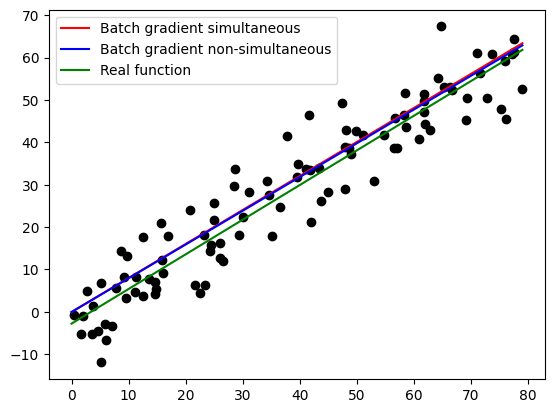

In [1687]:
plt.scatter(X,y, color='black')
x = np.arange(0, RANGE_VALUES,1)
plt.plot(f(x, thetas_sim[-1]), label='Batch gradient simultaneous', color='r')
plt.plot(f(x, thetas[-1]), label='Batch gradient non-simultaneous', color='b')
plt.plot(f(x,theta_reel), label='Real function', color='g')
plt.legend()
plt.show()

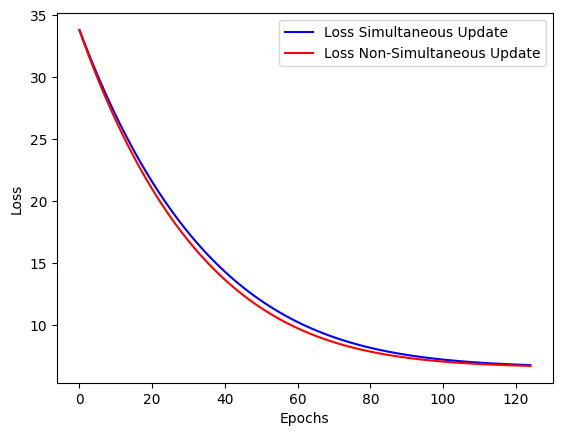

In [1688]:
plt.plot(loss_sim, label='Loss Simultaneous Update', color='b')
plt.plot(loss, label='Loss Non-Simultaneous Update',color='r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

The non-simultaneous gradient descent seems to converge faster than the simultaneous update. However, they both converge to the same result, and are both very similar.

We can now compare those results with the stochastic and the mini-batch gradient descent.

In [1689]:
thetas_sto, loss_sto,epochs_sto = linear_regression(X, y, mode='stochastic')
thetas_mini, loss_mini,epochs_mini = linear_regression(X, y, mode='mini_batch')

Results for stochastic gradient descent during 125 epochs: theta = [-0.310183    0.75349825], error = 6.559109383283128
Results for mini_batch gradient descent during 125 epochs: theta = [-0.06483415  1.03130684], error = 13.51086772565497


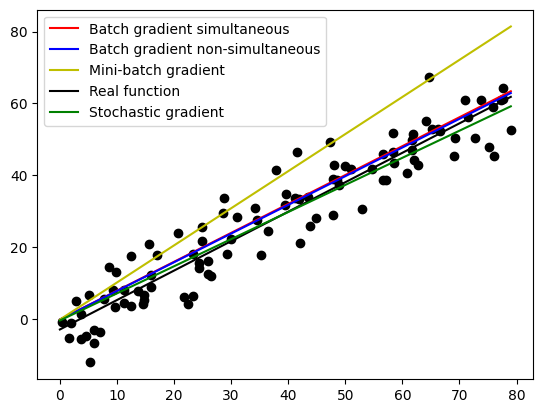

In [1690]:
plt.scatter(X,y, color='black')
x = np.arange(0, RANGE_VALUES,1)
plt.plot(f(x, thetas_sim[-1]), label='Batch gradient simultaneous', color='r')
plt.plot(f(x, thetas[-1]), label='Batch gradient non-simultaneous', color='b')
plt.plot(f(x, thetas_mini[-1]), label='Mini-batch gradient', color='y')
plt.plot(f(x,theta_reel), label='Real function', color='k')
plt.plot(f(x, thetas_sto[-1]), label='Stochastic gradient', color='g')
plt.legend()

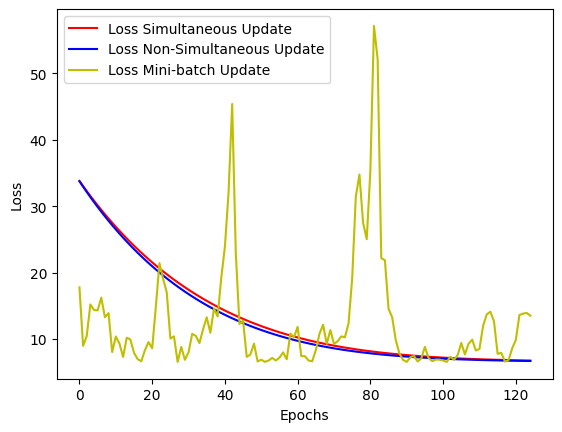

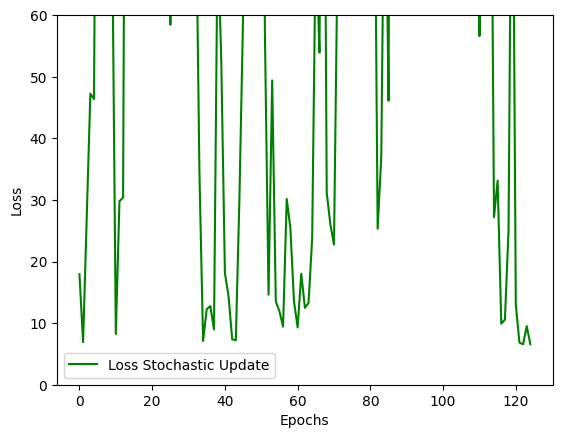

In [1691]:
plt.plot(loss_sim, label='Loss Simultaneous Update', color='r')
plt.plot(loss, label='Loss Non-Simultaneous Update', color='b')
plt.plot(loss_mini, label='Loss Mini-batch Update', color='y')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.ylim(0, 10000)
plt.legend()
plt.show()
plt.plot(loss_sto, label='Loss Stochastic Update', color='g')
plt.ylim(0, 60)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

The stochastic gradient is trained on one sample in each epoch. This is very unstable, and doesn't give results here. This could be improved by adjusting the learning rate with an optimizer such as Adam. 

The mini-batch gradient descent is trained on a small batch of samples in each epoch. It is more stable than the stochastic gradient descent, but less stable than the batch gradient descent. It converges really fast, but tends to over fit on some batches, resulting in a very unstable loss and an approximation of the real function that is not as good as the batch gradient descent or the stochastic gradient descent.